<a href="https://colab.research.google.com/github/Gnd10/PTB-Smart_Hunter/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

In [70]:
data = pd.read_csv("drive/MyDrive/APM/Iris1.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
data.isna().values.any()

False

In [72]:
print(data.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


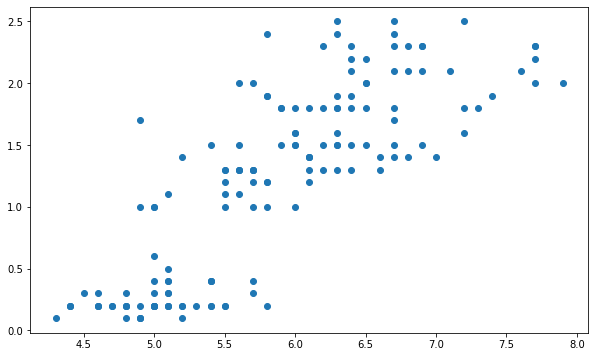

In [73]:
plt.scatter(data['SepalLengthCm'], data['PetalWidthCm'])
plt.show()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(data['SepalLengthCm'], data['PetalWidthCm'], test_size=0.20)


In [75]:
#Membuat model logistic regression
#Fungsi pembantu untuk menormalkan data
def normalize(X):
    return X - X.mean()

#Fungsi untuk membuat prediksi
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

#Fungsi untuk melatih model
def logistic_regression(X, Y):

    X = normalize(X)

    #Inisialisasi variabel
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        #Turunan dari loss wrt b0
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  
        #Turunan dari loss wrt b1
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

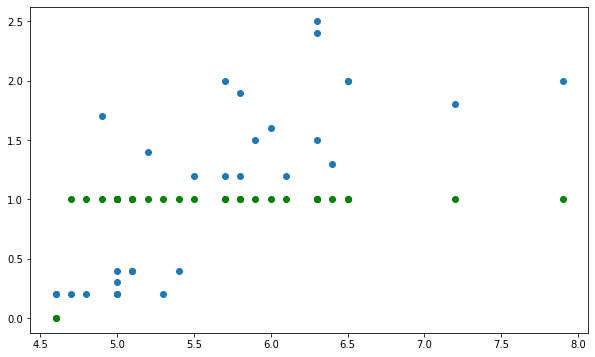

Accuracy = 0.0


In [81]:
#Melatih model
b0, b1 = logistic_regression(X_train, y_train)

#Membuat prediksi
# X_test = X_test.sort_values()  
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="green")
plt.show()

#Akurasi
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")